In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df=pd.read_csv("Source.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## <b> Insights </b>:

User_ID is not a feature and just an identifier. So setting it as an index of dataframe

In [3]:
# To change the index as User_ID
df=df.set_index("User_ID")
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 1000001 to 1006039
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 50.4+ MB


# Insights:

Occupation, Marital_Status, Product_Category_1, Product_Category_2 and Product_Category_3 are looking like categorical data and not like continuous valued features. So converting them to their corresponding data types.

In [5]:
print(df['Occupation'].unique())
print(df['Marital_Status'].unique())

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
[0 1]


In [6]:
df['Occupation']=df['Occupation'].astype('object')
df['Marital_Status']=df['Marital_Status'].astype('object')

In [7]:
print(df['Product_Category_1'].unique())
print(df['Product_Category_2'].unique())
print(df['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [8]:
df['Product_Category_1']=df['Product_Category_1'].astype('object')
df['Product_Category_2']=df['Product_Category_2'].astype('object')
df['Product_Category_3']=df['Product_Category_3'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 1000001 to 1006039
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  object
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  object
 7   Product_Category_1          550068 non-null  object
 8   Product_Category_2          376430 non-null  object
 9   Product_Category_3          166821 non-null  object
 10  Purchase                    550068 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 50.4+ MB


In [10]:
# Seggregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
# print columns
print("We have {} numerical features:\n\t{}".format(len(numerical_features),numerical_features))
print("We have {} categorical features:\n\t{}".format(len(categorical_features),categorical_features))

We have 1 numerical features:
	['Purchase']
We have 10 categorical features:
	['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


# Insights:
 We have 1 numerical feature and 10 categorical features.

In [11]:
# Descriptive summary of all the numerical features of the dataset
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


# Insights:

The minimum, maximum and mean values of customer's purchase are 12, 23961 and 9264 respectively.

In [12]:
# No of records and columns
df.shape

(550068, 11)

# Insights:
  The dataset consists of 550068 rows and 11 columns.

In [13]:
# Shows all the column names
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
# To know number of unique values of all the features
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

Product_ID = 3631
Gender = 2
Age = 7
Occupation = 21
City_Category = 3
Stay_In_Current_City_Years = 5
Marital_Status = 2
Product_Category_1 = 20
Product_Category_2 = 17
Product_Category_3 = 15
Purchase = 18105


In [15]:
# To check number of missing values in the dataset
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Insights:
Product_Category_2 and Product_Category_3 features contains null values.

In [16]:
# To check number of the duplicate records in the dataset
df.duplicated().sum()

113

# Insights:

The dataset consists of 113 duplicate records.

In [17]:
df[df.duplicated()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1002779,P00086442,M,36-45,7,B,1,0,8,13.0,15.0,10042
1005896,P00304142,M,26-35,0,A,4+,0,5,11.0,NaN,5143
1003774,P00149342,M,26-35,0,C,3,0,13,16.0,NaN,757
1000092,P00251242,F,18-25,4,B,1,0,5,11.0,NaN,7098
1000302,P00173042,M,18-25,4,B,4+,0,13,15.0,16.0,570
...,...,...,...,...,...,...,...,...,...,...,...
1005842,P00370293,M,26-35,4,B,0,0,19,NaN,NaN,24
1005865,P00370293,M,26-35,17,C,4+,0,19,NaN,NaN,48
1005894,P00370293,M,36-45,0,C,1,0,19,NaN,NaN,60


# Visualization:

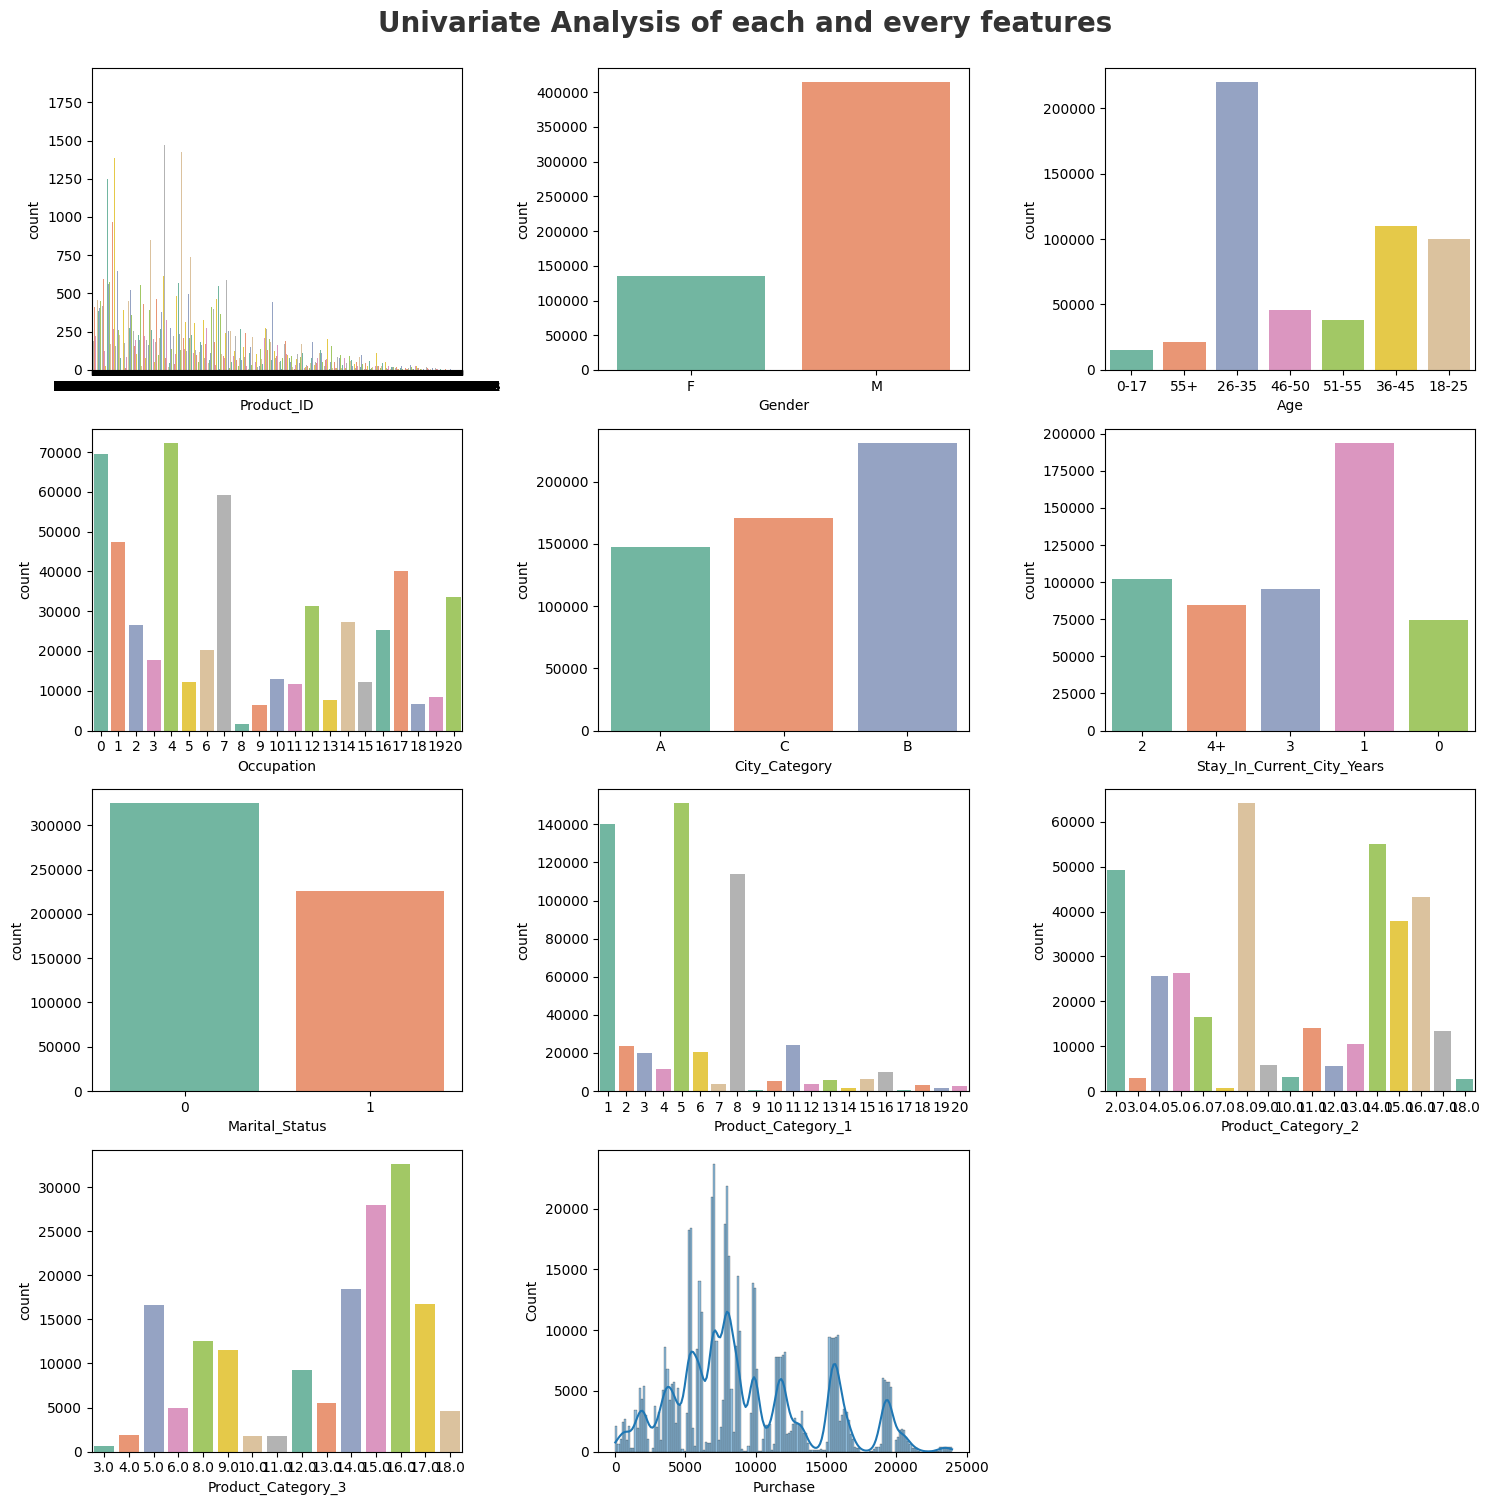

In [18]:
# Univariate Analysis of each and every feature in the dataset
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of each and every features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i,column in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  if column in numerical_features:
    sns.histplot(df[column],kde=True)
  else:
    sns.countplot(x=df[column],palette="Set2")
  plt.xlabel(column)
  plt.tight_layout()

In [19]:
df.groupby("Gender").agg({"Purchase":'mean'})

,Purchase
Gender,
F,8734.565765
M,9437.526040


# Insights:
Male had purchase value 8% more than female

In [20]:
df.groupby("Age").agg({"Purchase":'mean'})

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


#Insights:
Customer in the age group 51-55 has purchased more than the other groups, and customer under age group 17 has the least average purchase.

In [21]:
df.groupby("City_Category").agg({"Purchase":'mean'})

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993




Top 3 categories in Product_Category_1


,Top 3 Products,Mean Purchase Value
0,10,19675.570927
1,7,16365.689600
2,6,15838.478550


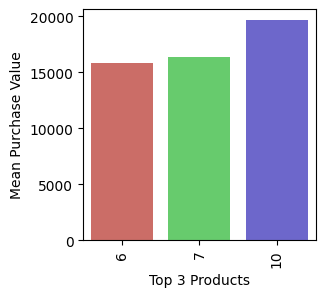



Top 3 categories in Product_Category_2


,Top 3 Products,Mean Purchase Value
0,10.0,15648.729543
1,2.0,13619.356401
2,6.0,11503.551379


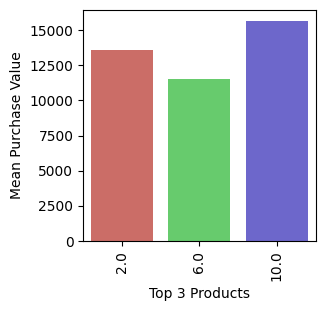



Top 3 categories in Product_Category_3


,Top 3 Products,Mean Purchase Value
0,3.0,13939.696574
1,10.0,13505.813441
2,6.0,13194.311043


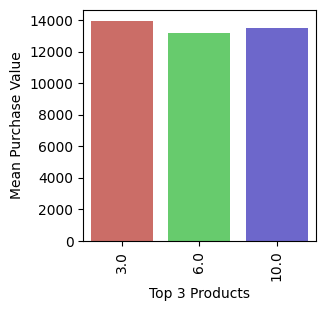

In [22]:
for col in ['Product_Category_1','Product_Category_2','Product_Category_3']:
  print(f"\n\nTop 3 categories in {col}")
  data=df.groupby(col).agg({"Purchase":'mean'}).sort_values(by='Purchase',ascending=False).iloc[:3].reset_index()
  data.columns=['Top 3 Products','Mean Purchase Value']
  display(data)
  plt.figure(figsize=(3,3))
  sns.barplot(x="Top 3 Products",y='Mean Purchase Value',data=data,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

#Insights:
Since the products may belong to other category also, based on the above inference, <b>category 10</b> is under top 3 on all product category features based on average purchase value.